In [22]:
import numpy as np
import pandas as pd

from nilearn import image
import os.path as op

from braincoder.utils import get_rsq

In [31]:
bids_folder = '/data/ds-prfsynth/BIDS'

ds = 'smallgrid'

# Load ground truth

def get_ground_truth(ds=ds, bids_folder=bids_folder):

    fn = op.join(bids_folder, 'derivatives', 'prfsynth', f'sub-{ds}', 'ses-1', f'sub-{ds}_ses-1_task-prf_acq-normal_run-01_bold.json')

    ground_truth = pd.read_json(fn)

    ground_truth = pd.concat((ground_truth.drop(['HRF', 'RF', 'Stimulus', 'Noise'], axis=1), ground_truth.apply(lambda row: pd.Series(row['RF']), axis=1)), axis=1, keys=['base', 'rf'])

    ground_truth = ground_truth.droplevel(0, axis=1)

    # # Remove capitalisation from column names
    ground_truth.columns = [col.lower() for col in ground_truth.columns]


    return ground_truth

def get_estimates(package='braincoder', ds=ds, bids_folder=bids_folder):

    if package.startswith('braincoder'):
        pars = ['centerx0', 'centery0', 'sigmamajor', 'sigmaminor', 'beta', 'baseline']
        fn_template = 'sub-{ds}_ses-1_task-prf_{par}.nii.gz'

    elif package == 'vista':
        pars = ['centerx0', 'centery0', 'sigmamajor', 'sigmaminor']
        fn_template = 'sub-{ds}_ses-1_task-prf_acq-normal_run-01_{par}.nii.gz'  #sub-verysmall_ses-1_task-prf_acq-normal_run-01_centerx0.nii.gz

    elif package == 'popeye':
        pars = ['centerx0', 'centery0', 'sigmamajor', 'sigmaminor', 'exponent', 'beta', 'baseline']
        fn_template = 'sub-{ds}_ses-1_task-prf_acq-normal_run-01_{par}.nii.gz'

    elif package == 'afni':
        pars = ['centerx0', 'centery0', 'sigmamajor', 'sigmaminor']
        fn_template = 'sub-{ds}_ses-1_task-prf_acq-normal_run-01_{par}.nii.gz'

    elif package == 'aprf':
        pars = ['centerx0', 'centery0', 'sigmamajor', 'sigmaminor', 'exponent', 'beta', 'baseline']
        fn_template = 'sub-{ds}_ses-1_task-prf_acq-normal_run-01_{par}.nii.gz'

    else:
        raise NotImplementedError('Only braincoder is implemented')

    pars_df = pd.DataFrame(columns=pars)

    for par in pars:
        fn = op.join(bids_folder, 'derivatives', f'prfanalyze-{package}', f'sub-{ds}', 'ses-1', fn_template.format(ds=ds, par=par))
        img = image.load_img(fn)
        pars_df[par] = img.get_fdata().flatten()

    return pars_df


def get_data(ds=ds, bids_folder=bids_folder):

    fn = op.join(bids_folder, f'sub-{ds}', 'ses-1', 'func', f'sub-{ds}_ses-1_task-prf_acq-normal_run-01_bold.nii.gz')

    return pd.DataFrame(image.load_img(fn).get_fdata().reshape(-1, image.load_img(fn).shape[-1]).T)


def get_modelpred(package='braincoder', ds=ds, bids_folder=bids_folder):

    folder = op.join(bids_folder, 'derivatives', f'prfanalyze-{package}', f'sub-{ds}', 'ses-1')

    if package == 'braincoder':
        fn = op.join(folder, f'sub-{ds}_ses-1_task-prf_modelpred.nii.gz')

    elif package == 'vista':
        fn = op.join(folder, f'sub-{ds}_ses-1_task-prf_acq-normal_run-01_modelpred.nii.gz')

    elif package == 'popeye':
        fn = op.join(folder, f'sub-{ds}_ses-1_task-prf_acq-normal_run-01_modelpred.nii.gz')
    
    elif package == 'afni':
        fn = op.join(folder, f'sub-{ds}_ses-1_task-prf_acq-normal_run-01_modelpred.nii.gz')

    elif package == 'aprf':
        fn = op.join(folder, f'sub-{ds}_ses-1_task-prf_acq-normal_run-01_modelpred.nii.gz')
        

    else:
        raise NotImplementedError(f'Package {package} not implemented')

    return pd.DataFrame(image.load_img(fn).get_fdata().reshape(-1, image.load_img(fn).shape[-1]).T)


In [35]:
ds = 'smallgrid'
packages = ['braincoder', 'vista', 'aprf', 'afni']
ground_truth = get_ground_truth(ds=ds)

estimates = []

for package in packages:
    estimates.append(get_estimates(package=package, ds=ds))

estimates = pd.concat(estimates, axis=1, keys=packages)

data = get_data(ds=ds)

modelpreds = []

for package in packages:
    modelpreds.append(get_modelpred(package=package, ds=ds))

rsq = []

for package, modelpred in zip(packages, modelpreds):
    rsq.append(get_rsq(data, modelpred))

rsq = pd.concat(rsq, axis=1, keys=packages)




ValueError: File not found: '/data/ds-prfsynth/BIDS/derivatives/prfanalyze-aprf/sub-smallgrid/ses-1/sub-smallgrid_ses-1_task-prf_acq-normal_run-01_exponent.nii.gz'

In [34]:
package

'mrvista'

In [14]:


braincoder_pred = get_modelpred(ds='smallgrid')


In [15]:
braincoder_estimates = get_estimates('braincoder', 'smallgrid')
vista_estimates = get_estimates('vista', 'smallgrid')

ground_truth = get_ground_truth('smallgrid')

<Axes: xlabel='centerx0', ylabel='centerx0'>

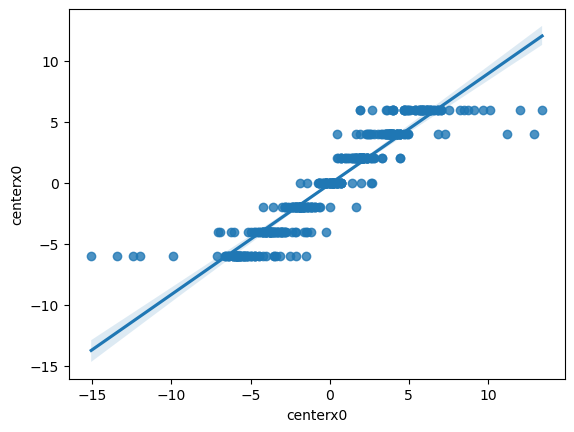

In [16]:
import seaborn as sns

sns.regplot(x=vista_estimates['centerx0'], y=ground_truth['centerx0'])

In [17]:
ground_truth

,tr,type,cssexp,signalpercentage,boldcontrast,boldmeanvalue,computesubclasses,snr,centerx0,centery0,theta,sigmamajor,sigmaminor,dog_sigmamajor,dog_sigmaminor,dog_theta,dog_scale,type
0,1,linear,0.05,bold,5,10000,True,1.409749,-6,-6,0,1,1,2,2,0,0.5,mrvista
1,1,linear,0.05,bold,5,10000,True,0.521460,-4,-6,0,1,1,2,2,0,0.5,mrvista
2,1,linear,0.05,bold,5,10000,True,0.986875,-2,-6,0,1,1,2,2,0,0.5,mrvista
3,1,linear,0.05,bold,5,10000,True,1.037965,0,-6,0,1,1,2,2,0,0.5,mrvista
4,1,linear,0.05,bold,5,10000,True,1.211563,2,-6,0,1,1,2,2,0,0.5,mrvista
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,1,linear,0.05,bold,5,10000,True,-5.955186,-2,6,0,5,5,2,2,0,0.5,mrvista
486,1,linear,0.05,bold,5,10000,True,-5.819970,0,6,0,5,5,2,2,0,0.5,mrvista
487,1,linear,0.05,bold,5,10000,True,-5.541784,2,6,0,5,5,2,2,0,0.5,mrvista
488,1,linear,0.05,bold,5,10000,True,-6.983702,4,6,0,5,5,2,2,0,0.5,mrvista


In [18]:
ground_truth

,tr,type,cssexp,signalpercentage,boldcontrast,boldmeanvalue,computesubclasses,snr,centerx0,centery0,theta,sigmamajor,sigmaminor,dog_sigmamajor,dog_sigmaminor,dog_theta,dog_scale,type
0,1,linear,0.05,bold,5,10000,True,1.409749,-6,-6,0,1,1,2,2,0,0.5,mrvista
1,1,linear,0.05,bold,5,10000,True,0.521460,-4,-6,0,1,1,2,2,0,0.5,mrvista
2,1,linear,0.05,bold,5,10000,True,0.986875,-2,-6,0,1,1,2,2,0,0.5,mrvista
3,1,linear,0.05,bold,5,10000,True,1.037965,0,-6,0,1,1,2,2,0,0.5,mrvista
4,1,linear,0.05,bold,5,10000,True,1.211563,2,-6,0,1,1,2,2,0,0.5,mrvista
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,1,linear,0.05,bold,5,10000,True,-5.955186,-2,6,0,5,5,2,2,0,0.5,mrvista
486,1,linear,0.05,bold,5,10000,True,-5.819970,0,6,0,5,5,2,2,0,0.5,mrvista
487,1,linear,0.05,bold,5,10000,True,-5.541784,2,6,0,5,5,2,2,0,0.5,mrvista
488,1,linear,0.05,bold,5,10000,True,-6.983702,4,6,0,5,5,2,2,0,0.5,mrvista


<Axes: xlabel='centerx0', ylabel='centerx0'>

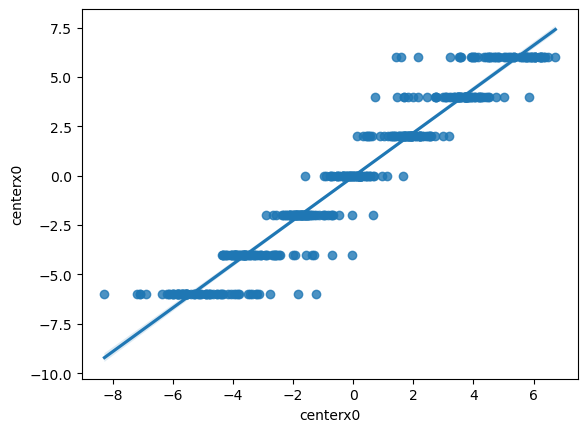

In [19]:
import seaborn as sns

sns.regplot(x=braincoder_estimates['centerx0'], y=ground_truth['centerx0'])

<Axes: xlabel='centery0', ylabel='centery0'>

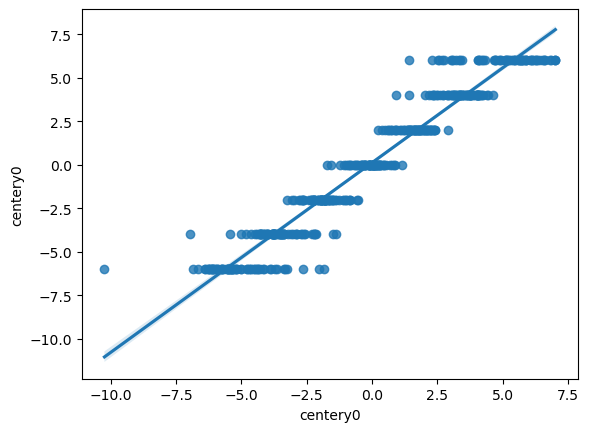

In [20]:
sns.regplot(x=braincoder_estimates['centery0'], y=ground_truth['centery0'])

<Axes: xlabel='sigmamajor', ylabel='sigmamajor'>

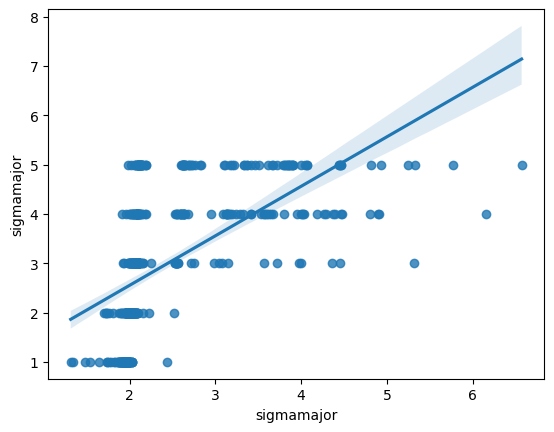

In [21]:
sns.regplot(x=braincoder_estimates['sigmamajor'], y=ground_truth['sigmamajor'])

<Axes: xlabel='sigmamajor', ylabel='sigmamajor'>

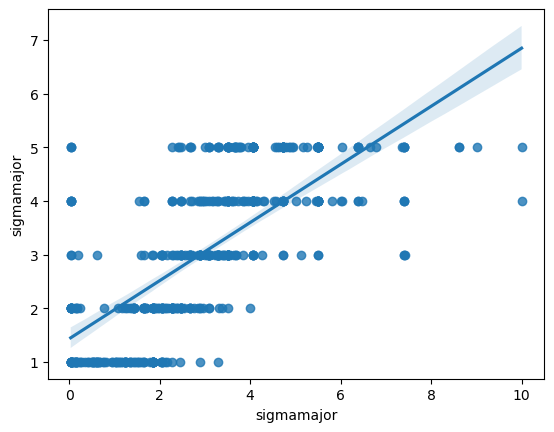

In [11]:
import seaborn as sns

sns.regplot(x=vista_estimates['sigmamajor'], y=ground_truth['sigmamajor'])